<a href="https://colab.research.google.com/github/Montenate/Wind-Energy-Modeling/blob/main/Single_Turbine_Model(Montreal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

Turbine Information:

Rated Power: **25 KW (7.7m/s)**
Cut-in Speed: **2.5 m/s**
Cut-out Speed: **20 m/s**

Blade length: **7.6 m**
Swept area: **181 m2**
Hub_height: **16m**

In [3]:
windspeed = pd.read_csv('15 - Wind-Speed.csv')
windspeed

,YEAR,MO,DY,HR,WS10M
0,2020,12,31,19,2.61
1,2020,12,31,20,2.77
2,2020,12,31,21,2.86
3,2020,12,31,22,2.87
4,2020,12,31,23,2.92
...,...,...,...,...,...
8755,2021,12,31,14,2.73
8756,2021,12,31,15,2.65
8757,2021,12,31,16,2.32
8758,2021,12,31,17,2.21


In [7]:
ws = windspeed.iloc[:,4:5]
ws

,WS10M
0,2.61
1,2.77
2,2.86
3,2.87
4,2.92
...,...
8755,2.73
8756,2.65
8757,2.32
8758,2.21


In [9]:
ws.describe()

,WS10M
count,8760.000000
mean,3.115121
std,1.488002
min,0.150000
25%,2.140000
50%,2.830000
75%,3.790000
max,11.130000


In [ ]:
# In case you have wind speed data with km/h unit
#def meter_second(x)
 # return x/3.6

In [10]:
AD = 1.275 # kg/m3
BZ = 0.593
Area = 181 #m2
Eff = 0.8

def wind_p(x):
  return (0.5*AD*Area*(x**3)*BZ*Eff)/1000

Wind_Power = wind_p(ws)
Wind_Power

,WS10M
0,0.973251
1,1.163437
2,1.280565
3,1.294044
4,1.362862
...,...
8755,1.113759
8756,1.018688
8757,0.683545
8758,0.590854


Rename the WS10m column title

In [12]:
Wind_Power.rename(columns = {'WS10M':'Power_Output (KW)'}, inplace = True)
Wind_Power

,Power_Output (KW)
0,0.973251
1,1.163437
2,1.280565
3,1.294044
4,1.362862
...,...
8755,1.113759
8756,1.018688
8757,0.683545
8758,0.590854


Calculating the Cut-in Power Output from Cut-in windspeed and Cut-out Power Output from Cut-out windspeed. KW

In [13]:

#wind_p(2.5)


0.85530984375

In [16]:
#wind_p(20)

437.91864

In [18]:
# Modeling the Power Curve Parameters

Wind_Power.loc[(Wind_Power['Power_Output (KW)']>=25) & (Wind_Power['Power_Output (KW)']<437)] = 25 #Between Rated Power and Cut-out Power
Wind_Power.loc[Wind_Power['Power_Output (KW)']>=437] = 0  #After Cut-out Power
Wind_Power.loc[Wind_Power['Power_Output (KW)']<=0.855] = 0  #Before Cut-In Power

**Visualization**

Wind Power Output

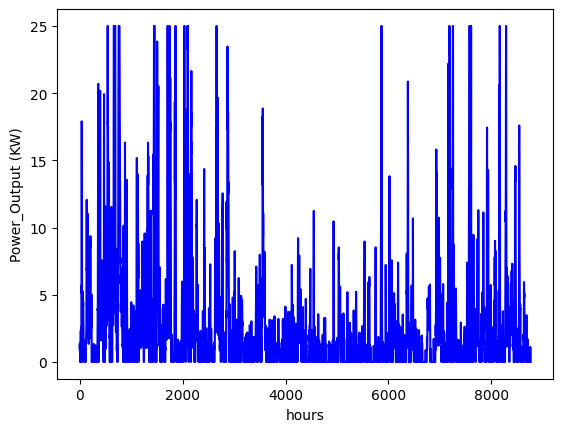

In [21]:
plt.plot(Wind_Power, c= 'b')
plt.xlabel('hours')
plt.ylabel('Power_Output (KW)')
plt.show()

Power Curve

In [26]:
# this sorting is necesaary to generate a smooth Power Curve devoid of iregularities because of in-ordered wind speed

DF = pd.concat([Wind_Power, ws], axis=1)
DF.sort_values(by = ['WS10M'], ascending = True, ignore_index=True, inplace=True)
DF

,Power_Output (KW),WS10M
0,0.0,0.15
1,0.0,0.15
2,0.0,0.17
3,0.0,0.17
4,0.0,0.19
...,...,...
8755,25.0,10.20
8756,25.0,10.22
8757,25.0,10.31
8758,25.0,10.32


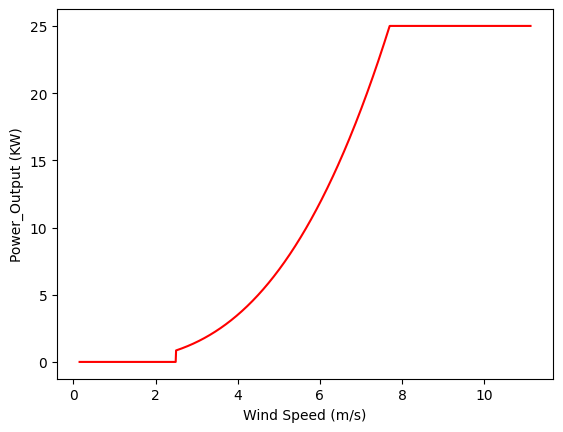

In [27]:
plt.plot(DF['WS10M'], DF['Power_Output (KW)'], c= 'r')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power_Output (KW)')
plt.show()